### Faceting

#### imports and data prep

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
fuel_econ = pd.read_csv('./fuel_econ.csv')

### Example 1.

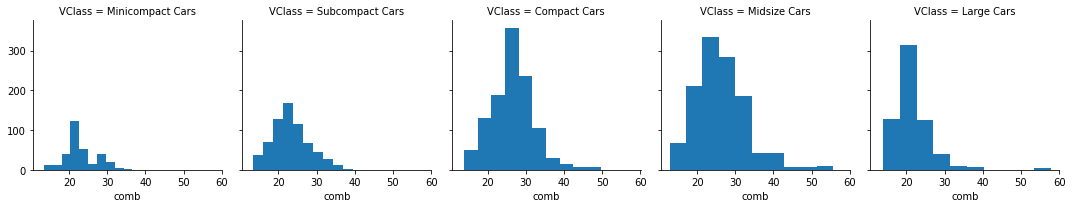

In [8]:
# Convert the "VClass" column from a plain object type into an ordered categorical type
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(categories=sedan_classes, ordered=True)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)

# Plot the Seaborn's FacetGrid
g = sb.FacetGrid(data=fuel_econ, col='VClass')
g.map(plt.hist, 'comb');

### Example 2.

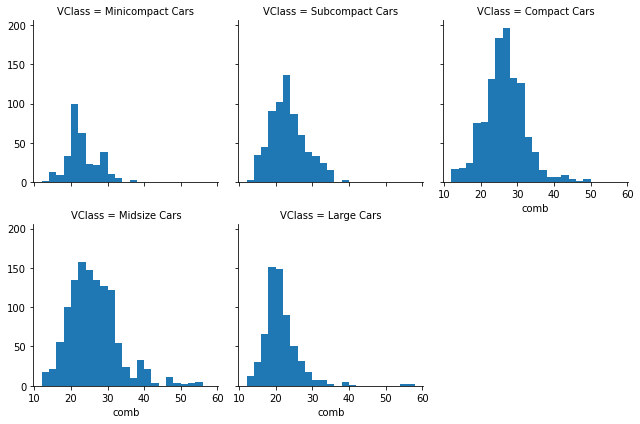

In [16]:
bin_edges = np.arange(12, fuel_econ['comb'].max().round() + 2, 2)
# Try experimenting with dynamic bin edges
# bin_edges = np.arange(-3, fuel_econ['comb'].max()+1/3, 1/3)
g = sb.FacetGrid(data=fuel_econ, col='VClass', col_wrap=3)
g.map(plt.hist, 'comb', bins=bin_edges);

### Example 3.

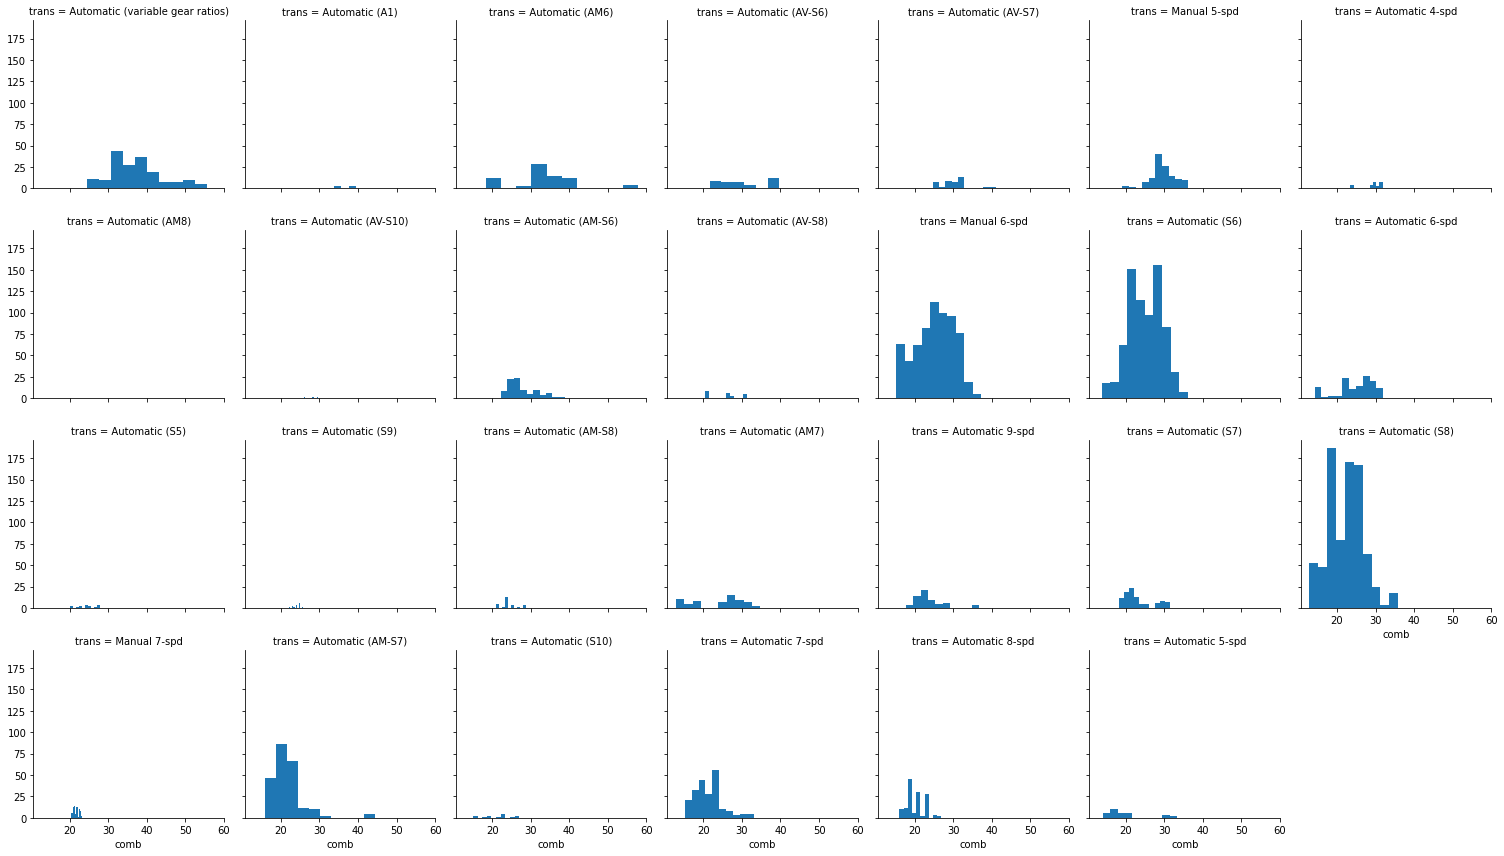

In [22]:
# Find the order in which you want to display the Facets
# For each transmission type, find the combined fuel efficiency
group_means = fuel_econ[['trans', 'comb']].groupby(['trans']).mean()

# Select only the list of transmission type in the decreasing order of combined fuel efficiency
group_order = group_means.sort_values(['comb'], ascending = False).index

# Use the argument col_order to display the FacetGrid in the desirable group_order
g = sb.FacetGrid(data = fuel_econ, col = 'trans', col_wrap = 7, col_order = group_order)
g.map(plt.hist, 'comb');